# SVM 
Conny Lin | started: June 11, 2020 | updated: June 20, 2020


[C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using sklearn.svm.LinearSVC or sklearn.linear_model.SGDClassifier instead, possibly after a sklearn.kernel_approximation.Nystroem transformer.

[User Guide](https://scikit-learn.org/stable/modules/svm.html)

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

## set up


### local computer

In [ ]:
# import local libraries using host specific paths
import socket, sys, time, datetime, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get paths for local computer
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'

# import local variables
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
from brainstation_capstone.ml.toolbox.mlSOP import ModelEvaluation
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
data_dir = os.path.join(localpaths['Capstone'], 'data')

# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')

getting host computer specific paths
None
None


### google colab

In [2]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# import functions and data
print('import functions')
import pandas as pd
import numpy as np
import os, time, datetime
import matplotlib.pyplot as plt

# define file directory
data_dir = '/content/gdrive/My Drive/ED Brain Station/data'

class test_model:
    def __init__(self):
        # set test and train score
        self.test_acc = []
        self.train_acc = []
    def score_data(self, model, datadict):
        self.model = model
        self.data = datadict
        # fit model
        self.model.fit(self.data['X_train'], self.data['y_train'])
        # train score
        train_score = self.model.score(self.data['X_train'], self.data['y_train'])
        print(f"\tTrain Score: {train_score}")
        self.train_acc.append(train_score)
        # test score
        test_score = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f"\tTest Score: {test_score}")
        self.test_acc.append(test_score)

class ml_timer:
    def __init__(self):
        # initate session start time
        self.start = time.time()
        # initiate holder for times
        self.session_times = []
        print('timer starts')

    def param_start(self):
        # update current session start time
        self.current_session_start = time.time()

    def param_end(self):
        end_time = time.time()
        elapsed_time = end_time - self.current_session_start
        print(f'\telapsed time {elapsed_time/60:.3f} min')
        self.session_times.append(elapsed_time)
    
    def session_end(self):
        self.end = time.time()
    
    def get_time(self):
        self.session_times = (self.end - self.start)/60
        print(f'total time: {self.session_times:.3f} min')
        return self.session_times

def hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, \
                        hyperparameter_name='', xscale='linear', titlename=''):
    # check if hyperparameter list is string or number
    if isinstance(hyperparameter_list[0], str):
        hyperparameter_label = hyperparameter_list.copy()
        hyperparameter_list = range(len(hyperparameter_list))
    # graph
    plt.figure()
    plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
    plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
    plt.title(titlename)
    plt.xlabel(hyperparameter_name)
    if isinstance(hyperparameter_list[0], str):
        plt.xticks(labels=hyperparameter_label)
    plt.ylabel('accuracy score')
    plt.xscale(xscale)
    plt.legend()
    plt.show()

def load_nutcracker_csv(dir_datafolder):
    datatype = ['X_train','X_test','y_train','y_test']
    print(f'loading {len(datatype)} files')
    datadict = dict()
    for i, dname in enumerate(datatype):
        print(f'loading file: {i}', end='\r')
        filename = 'nutcracker' + '_' + dname + '.csv'
        filepath = os.path.join(dir_datafolder, filename)
        data = pd.read_csv(filepath, header=None, index_col=False)
        datadict[dname] = data.to_numpy()
    print('\nloading completed')
    return datadict



class ModelEvaluation:
    def __init__(self, model, data_dir):
        self.model = model
        self.data_dir = data_dir
    
    def load_data(self):
        if not hasattr(self, 'data'):
            self.data = load_nutcracker_csv(self.data_dir)

    def cross_val_score(self, cv=5):
        timer = ml_timer()
        if not hasattr(self, 'data'):
            self.load_data()
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(self.model, 
                    self.data['X_train'], 
                    self.data['y_train'], 
                    cv=cv)
        timer.session_end()
        self.runtime_crossval = timer.get_time()
        print(f'cross validation scores: {scores}')
        print(f'validation score (mean):{np.mean(scores)}')
        print(f'validation score (std):{np.std(scores)}')
        self.cross_val_score_ = scores
        return self.cross_val_score_
    
    def fitmodel(self):
        if not hasattr(self, 'data'):
            self.load_data()
        self.model.fit(self.data['X_train'], self.data['y_train'])
        return self.model
    
    def predict(self):
        if not hasattr(self, 'data'):
            self.load_data()
        timer = ml_timer()
        self.y_pred_test = self.model.predict(self.data['X_test'])
        timer.session_end()
        self.runtime_predict = timer.get_time()
        self.y_pred_train = self.model.predict(self.data['X_train'])

    def accuracy_score(self):
        if not hasattr(self, 'data'):
            self.load_data()
        self.score_train = self.model.score(self.data["X_train"], self.data['y_train'])
        print(f'accuracy score on train: {self.score_train}')
        self.score_test = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f'accuracy score on test: {self.score_test}')
        return self.score_train, self.score_test

    def confusion_matrix(self):
        if not hasattr(self, 'y_pred_test'):
            self.predict()
        # fitmodel and predict must proceed this.
        # define dataframe labels
        columns = ['Predicted normal', 'Predicted alcohol']
        indexname = ['True normal', 'True alcohol']
        from sklearn.metrics import confusion_matrix
        # run confusion matrix - test
        self.conf_matrix_test = confusion_matrix(self.data['y_test'], self.y_pred_test, 
                                            normalize='true')
        conf_matrix_test_df = pd.DataFrame(self.conf_matrix_test, columns=columns)
        conf_matrix_test_df.index = indexname
        print('\nconfusion matrix: test data')
        print(conf_matrix_test_df)
        # run confusion matrix - train
        self.conf_matrix_train = confusion_matrix(self.data['y_train'], 
                                            self.y_pred_train, 
                                            normalize='true')
        conf_matrix_train_df = pd.DataFrame(self.conf_matrix_train, columns=columns)
        conf_matrix_train_df.index = indexname
        print('\nconfusion matrix: train data')
        print(conf_matrix_train_df)
        return self.conf_matrix_test, self.conf_matrix_train
    
    def display_confusion_matrix(self):
        if not hasattr(self, 'conf_matrix_test'):
            self.confusion_matrix()
        # confusion_matrix must proceed this
        display_labels = ['normal', 'alcohol']
        from sklearn.metrics import ConfusionMatrixDisplay
        print('\nconfusion matrix for test')
        plt.figure()
        ConfusionMatrixDisplay(self.conf_matrix_test, display_labels=display_labels).plot()
        plt.show()
        print('\nconfusion matrix for train')
        plt.figure()
        ConfusionMatrixDisplay(self.conf_matrix_train, display_labels=display_labels).plot()
        plt.show()

    def classification_report(self):
        if not hasattr(self, 'y_pred_test'):
            self.predict()
        from sklearn.metrics import classification_report
        self.eval_score_report = classification_report(self.data['y_test'], 
                                                        self.y_pred_test)
        print(self.eval_score_report)
    
    def print_evaluation_scores(self):
        if not hasattr(self, 'y_pred_test'):
            self.predict()        
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import f1_score
        self.precision_score = precision_score(self.data["y_test"], self.y_pred_test)
        self.recall_score = recall_score(self.data["y_test"], self.y_pred_test)
        self.f1_score = f1_score(self.data["y_test"], self.y_pred_test)
        print(f'precision_score = {self.precision_score}')
        print(f'recall_score = {self.recall_score}')
        print(f'f1_score = {self.f1_score}')
    
    def test_data_class_proba(self):
        if not hasattr(self, 'data'):
            self.load_data()        
        false_proba = np.count_nonzero(self.data['y_test']) / self.data['y_test'].shape[0]
        true_proba = 1.0 - false_proba
        print(f'test set normal case probability: {false_proba}')
        print(f'test set alcohol case probability: {true_proba}')
        self.real_proba = dict()
        self.real_proba['false_proba'] = false_proba
        self.real_proba['true_proba'] = true_proba
    
    def predict_proba(self):
        if not hasattr(self, 'data'):
            self.load_data()
        self.y_proba_test = self.model.predict_proba(self.data['X_test'])[:,1]
        self.y_proba_train = self.model.predict_proba(self.data['X_train'])[:,1]
        return self.y_proba_test, self.y_proba_train

    def proba_thresholds(self):
        if not hasattr(self, 'data'):
            self.load_data()
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score
        # Vary thresholds by 0.05 from 0.05 to 0.95
        thresholds = np.arange(0.05, 1, 0.05)
        precisions = list()
        recalls = list()
        neg_recalls = list()
        for threshold in thresholds:
            # Apply threshold
            y_threshold = np.where(self.y_proba_test > threshold, 1, 0)
            # Calculate precision and recall
            precision = precision_score(self.data['y_test'], y_threshold)
            recall = recall_score(self.data['y_test'], y_threshold)
            neg_recall = recall_score(1-self.data['y_test'], 1-y_threshold)
            # Append to list
            precisions.append(precision)
            recalls.append(recall)
            neg_recalls.append(neg_recall)
        # Visualize the result
        plt.figure()
        plt.plot(thresholds, precisions, label='precision', marker='o')
        plt.plot(thresholds, recalls, label='recall', marker='o')
        plt.xlim(0, 1)
        plt.xlabel('threshold')
        plt.ylabel('score')
        plt.legend()
        plt.show()
        return precisions, recalls, neg_recalls
        
    def roc_auc(self):
        if hasattr(self, 'y_proba_train'):
            self.predict_proba()
        from sklearn.metrics import roc_curve, roc_auc_score
        # get roc auc train
        fprs_train, tprs_train, thresholds_train = roc_curve(self.data['y_train'], self.y_proba_train)
        roc_auc_train = roc_auc_score(self.data['y_train'], self.y_proba_train)
        # get roc auc test
        fprs_test, tprs_test, thresholds_test = roc_curve(self.data['y_test'], self.y_proba_test)
        roc_auc_test = roc_auc_score(self.data['y_test'], self.y_proba_test)
        # Plot the ROC curve.
        plt.figure()
        plt.plot(fprs_train, tprs_train, color='gray', lw=5, label='train', linestyle=' ', marker='.')
        plt.plot(fprs_test, tprs_test, lw=1, color='red', label='test')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='expected')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC and AUC')
        plt.legend(loc="best")
        plt.show()
        print(f"Test AUC score: {roc_auc_test}")
        print(f"Train AUC score: {roc_auc_train}")
        self.roc_auc_test = roc_auc_test
        self.roc_auc_train = roc_auc_train
    
    def save(self, savedir):
        # remove data from object to save space
        if hasattr(self, 'data'):
            delattr(self, 'data')
        if hasattr(self, 'y_pred_test'):
            delattr(self, 'y_pred_test')
        if hasattr(self, 'y_pred_train'):
            delattr(self, 'y_pred_train')
        if hasattr(self, 'y_proba_test'):
            delattr(self, 'y_proba_test') 
        if hasattr(self, 'y_proba_train'):
            delattr(self, 'y_proba_train') 
        # get model name
        model_type = type(self.model)
        model_type_str  = str(model_type)
        model_name_components = model_type_str.split('.')
        model_name = model_name_components[-1].replace("'>","")
        # save
        import pickle, os
        savepath = os.path.join(savedir, model_name+'_eval.pickle')
        pickle.dump(self, open(savepath, 'wb'))

    def excel_input_array(self):
        report = [np.mean(self.cross_val_score_),
                    np.std(self.cross_val_score_),
                    self.score_train,
                    self.score_test,
                    self.precision_score,
                    self.recall_score,
                    self.f1_score]
        if hasattr(self, 'roc_auc_train'):
            report.append(self.roc_auc_train)
            report.append(self.roc_auc_test)
        report.append(self.runtime_crossval)
        report.append(self.runtime_predict)
        print(report)
        print(self.model)
    
    def standard(self, save_dir):
        if not hasattr(self.model, 'predict_proba'):
            print('confirm: model has no predict_proba')
        print('\nloading data from directory')
        self.load_data()
        print('\nruning cross validation scores (this takes a while):')
        self.cross_val_score(5)
        print('\nfit model...')
        self.fitmodel()
        print('predict model...')
        self.predict()
        print('\naccuracy scores:')
        self.accuracy_score()
        print('\nconfusion matrix:')
        self.confusion_matrix()
        self.display_confusion_matrix()
        print('\nclassification report:')
        self.classification_report()
        self.print_evaluation_scores()
        if hasattr(self.model, 'predict_proba'):
            print('\nreal data class proba:')
            self.test_data_class_proba()
            print('\n prediction proba:')
            self.predict_proba()
            print('\nproba threshold analysis:')
            self.proba_thresholds()
            print('\nROC AUC analysis:')
            self.roc_auc()
            print('\nSaving model...')
        else:
            print('\nthis model does not have predict_proba attr')
        self.save(save_dir)
        print('\nexcel record:')
        self.excel_input_array()

import functions


In [ ]:
# get files from google drive
print('loading data to data dictionary')
datatype = ['X_train','X_test','y_train','y_test']
dataname = 'nutcracker'
data = dict()
for i, dname in enumerate(datatype):
    print(f'loading file: {i}', end='\r')
    filename = dataname + '_' + dname + '.csv'
    filepath = os.path.join(data_dir, filename)
    data[dname] = np.loadtxt(filepath, delimiter=',')
print('loading completed')
# print the array shape to confirm successful loading
print(data['X_train'].shape)
# report time run
print(f'last ran on: {datetime.datetime.now()} PT')

## tune C: 0.0001 - 1000000
lower C seems to be better

In [ ]:
# ML specific 
outputfolder = os.path.join(pCapstone,'ml_svm')
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
from brainstation_capstone.etl.datatransform import Nutcracker
NC = Nutcracker(datapath)
X_train, X_test, y_train, y_test = NC.mldata()

In [ ]:
X_train.shape

(1600000, 21)

In [ ]:
X_test.shape

(400000, 21)

running c=1e-05
running c=0.0001


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=0.001


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=0.01


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=0.1


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=1


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=10


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=100


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=1000


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=10000


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


running c=100000


/Users/connylin/opt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


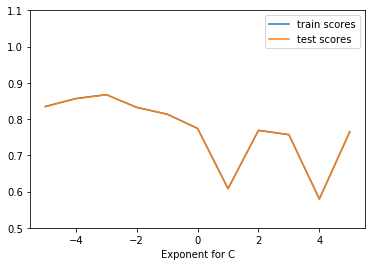

0.8670525


In [ ]:
train_scores = []
test_scores = []
kernel=['linear','rbf','poly']
max_iter = 1000

for i in range(-5,6):
    c = 10**i
    print(f'running c={c}')
    my_svm = LinearSVC(C=c, max_iter=1000)
    my_svm.fit(X_train, y_train)

    train_scores.append(my_svm.score(X_train, y_train))
    test_scores.append(my_svm.score(X_test, y_test))

plt.figure()
plt.plot(range(-5,6), train_scores, label="train scores")
plt.plot(range(-5,6), test_scores, label="test scores")
plt.legend()
plt.ylim(0.5, 1.1)
plt.xlabel("Exponent for C")
plt.show()

print(np.max(test_scores))

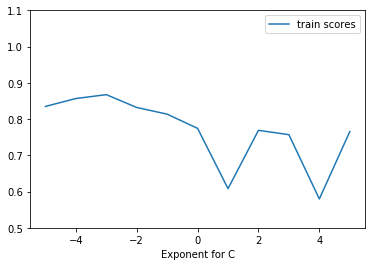

0.8670525


In [ ]:
plt.figure()
plt.plot(range(-5,6), train_scores, label="train scores")
# plt.plot(range(-5,6), test_scores, label="test scores")
plt.legend()
plt.ylim(0.5, 1.1)
plt.xlabel("Exponent for C")
plt.show()

print(np.max(test_scores))


lower C seems to be better

## gridCV tune C, kernel
Best: 0.749276 using {'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 318}

In [ ]:
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import timeit

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
gamma = ['scale']
max_iter = [1000]
random_state = [318]
# define grid search
grid = dict(kernel=kernel, C=C, gamma=gamma, max_iter=max_iter, random_state=random_state)

# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X_train, _, y_train, _ = Nutcracker(datapath).mldata(feature_reduction='None')

# grid search setting
cv = 5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0, verbose=5)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print('printing individual results')
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

None
None
Fitting 5 folds for each of 21 candidates, totalling 105 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 127.5min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 174.4min finished
printing individual results
0.500192 (0.000106) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000, 'random_state': 318}
0.591168 (0.070447) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 318}
0.569534 (0.022842) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 1000, 'random_state': 318}
0.500161 (0.000049) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000, 'random_state': 318}
0.582687 (0.028495) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 318}
0.569534 (0.022842) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoi

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print('printing individual results')
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

printing individual results
0.500192 (0.000106) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000, 'random_state': 318}
0.591168 (0.070447) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 318}
0.569534 (0.022842) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 1000, 'random_state': 318}
0.500161 (0.000049) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000, 'random_state': 318}
0.582687 (0.028495) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 318}
0.569534 (0.022842) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': 1000, 'random_state': 318}
0.501893 (0.002970) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000, 'random_state': 318}
0.679171 (0.018453) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 1000, 'random_state': 318}
0.569542 (0.022845) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid', 'ma

## run best hyperparamter so far evaluation

confirm: model has no predict_proba

loading data from directory
loading 4 files
loading file: 3
loading completed

runing cross validation scores (this takes a while):
timer starts


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


total time: 18.911 min
cross validation scores: [0.73669688 0.74585625 0.7626125  0.74920625 0.75200625]
validation score (mean):0.7492756249999999
validation score (std):0.008429121395495499

fit model...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


predict model...
timer starts
total time: 0.656 min

accuracy scores:
accuracy score on train: 0.75219125
accuracy score on test: 0.7521525

confusion matrix:

confusion matrix: test data
              Predicted normal  Predicted alcohol
True normal           0.825254           0.174746
True alcohol          0.321036           0.678964

confusion matrix: train data
              Predicted normal  Predicted alcohol
True normal           0.824905           0.175095
True alcohol          0.320501           0.679499

confusion matrix for test


<Figure size 432x288 with 0 Axes>

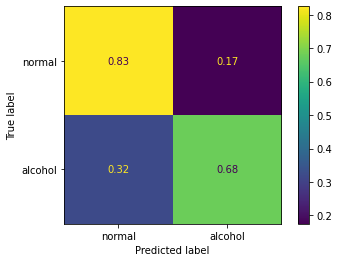


confusion matrix for train


<Figure size 432x288 with 0 Axes>

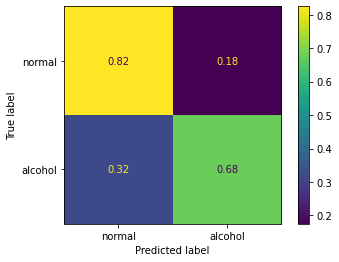


classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77    200119
         1.0       0.80      0.68      0.73    199881

    accuracy                           0.75    400000
   macro avg       0.76      0.75      0.75    400000
weighted avg       0.76      0.75      0.75    400000

precision_score = 0.7951160637911437
recall_score = 0.6789639835702242
f1_score = 0.7324638455539274

this model does not have predict_proba attr

excel record:


AttributeError: ignored

In [3]:
from sklearn.svm import SVC
model = SVC(random_state=318, C=0.001, kernel='rbf', max_iter=1000, verbose=1)
save_dir = os.path.join(data_dir, 'ml_eval_results')
model_eval = ModelEvaluation(model, data_dir)
model_eval.standard(save_dir)

In [4]:
# patch 
a = [np.mean(model_eval.cross_val_score_), np.std(model_eval.cross_val_score_), 
      model_eval.score_train, model_eval.score_test, model_eval.precision_score,
      model_eval.recall_score,
      model_eval.f1_score]
for p in a:
  print(p, end=', ')

0.7492756249999999, 0.008429121395495499, 0.75219125, 0.7521525, 0.7951160637911437, 0.6789639835702242, 0.7324638455539274, 

In [5]:
model_eval.model

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=1000, probability=False, random_state=318, shrinking=True,
    tol=0.001, verbose=1)

## run evaluation (debugged)


In [ ]:
from sklearn.svm import SVC
model = SVC(random_state=318, C=0.001, kernel='rbf', max_iter=1000, verbose=1)
save_dir = os.path.join(data_dir, 'ml_eval_results')
model_eval = ModelEvaluation(model, data_dir)
model_eval.standard(save_dir)

confirm: model has no predict_proba

loading data from directory
loading 4 files
loading file: 3
loading completed

runing cross validation scores (this takes a while):
timer starts


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

## Conclusion
This model is impractical for the time it requires to tune dataset at the millions scale. Can consider trying LinearSVCor SGDClassifier.

## Try SGDClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier